In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
from tqdm import tqdm
import functools
from work.ws_paper.multilayer.matlab_code import multilayer
from work.ws_paper.multilayer import utils

In [2]:
# Define physical parameters for the fiber Bragg grating
num_layers = 1000

# The structure looks like
# n0 n1 n2 n1 n2 ... n1 n2 n1 n0
n_1 = 1.45
n_2 = 1.48
n_section = [n_1, n_2]
n = [1.0] + num_layers * n_section + [n_1] + [1.0]

L_layer = 1e-3
L_section = [L_layer, L_layer]
L = [0.0] + num_layers * L_section + [L_layer] + [0.0]

# Link that will be perturbed
random.seed(0)
n_index = random.randint(1, len(n) - 2)

# S matrix function (and inverse)
get_S = functools.partial(multilayer.get_S, n=n, L=L)
get_S_inv = functools.partial(multilayer.get_S_inv, n=n, L=L)
get_dS_dk0 = functools.partial(multilayer.get_dS_dk0, n=n, L=L)
get_dS_dn = functools.partial(multilayer.get_dS_dn, n=n, L=L, n_index=n_index)

In [3]:
# Dlam = 1e-11
# lam_centre = 550e-9
# lam_min = lam_centre - Dlam
# lam_max = lam_centre + Dlam

# k0_min = 2 * np.pi / lam_max - 100j
# k0_max = 2 * np.pi / lam_min + 0j
# num_points = 1 * 10**2

# x, y, data = utils.sweep(k0_min, k0_max, num_points, get_S_inv)

In [4]:
# fig, ax = plt.subplots()
# im = ax.imshow(
#     -np.log(data),
#     extent=(k0_min.real, k0_max.real, 0.0, -100),
#     aspect="auto",
# )

In [5]:
# Pole of unperturbed system
pole_guess = 1.142e7 + 3825 - 1j
pole = utils.find_pole(get_S_inv, pole_guess)
print(pole)
print(get_S(pole))

(11423825.232347403-0.5713366402791336j)
[[-1.51482427e+08-33438199.85706531j -1.51482425e+08-33438199.95199218j]
 [-1.51482425e+08-33438199.95199218j -1.51482427e+08-33438199.85706529j]]


In [6]:
# Perturb the sytem
Dn = 1e-6
shifts = []
for n_index in tqdm(range(1, len(n)-1)):
    # n_perturbed = copy.deepcopy(n)
    # n_perturbed[n_index] += Dn

    # new S matrix function (and inverse)
    # get_S_perturbed = functools.partial(multilayer.get_S, n=n_perturbed, L=L)
    # get_S_inv_perturbed = functools.partial(
    #     multilayer.get_S_inv, n=n_perturbed, L=L
    # )

    ws_n_res = utils.get_residue(
        functools.partial(multilayer.get_ws_n, n=n, L=L, n_index=n_index),
        pole,
        radius=0.1,
    )
    shift = 1j * np.trace(ws_n_res) * Dn
    shifts.append(shift)


100%|██████████| 2001/2001 [2:56:40<00:00,  5.30s/it]  


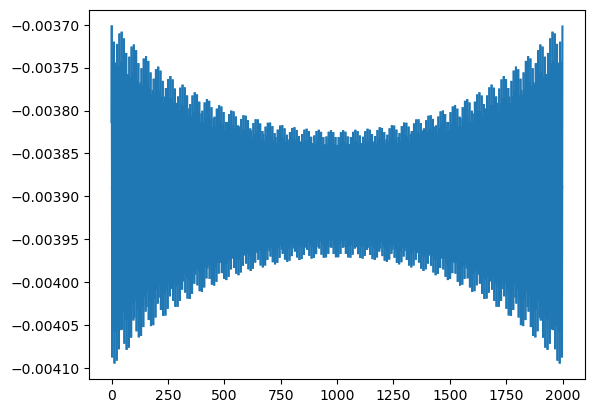

In [7]:
fig, ax= plt.subplots()

starts = shifts[0:-2]
ends = shifts[1:]

for i, (start, end) in enumerate(zip(starts, ends)):
    ax.plot([i, i+1], [start.real, end.real], color="tab:blue")

In [8]:
len(shifts)

2001